


James Bay Coordinates
53°30′N 80°30′W



In [1]:

# Data related libraries
import numpy as np
import netCDF4 as nc
import glob
import os

# Plotting related libraries
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()                
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Machine specific libraries
from sys import platform



In [5]:
#Setting up machine specific path

if platform == "linux" or platform == "linux2":
    # linux
    
    # setup paths
    mask_path = '/mnt/storage0/jmarson/ANALYSES/MASKS/'
    data_path = '/mnt/storage0/jmarson/NEMO/ANHA4/ANHA4-EPM111-S/'
    
elif platform == "darwin":
    # OS X

    # setup paths
    data_path = '/Users/jeenriquez/Documents/CEOS/Test_Data/'
    mask_path = '/Users/jeenriquez/Documents/CEOS/Test_Data/'
        
# Get complete file list from path
file_list = os.listdir(data_path)


if platform == "linux" or platform == "linux2":
    # linux
    
    #Set data list params
    year= '1998'
    grid = 'T'
    
    #selecting list of files given params
    file_list = sorted([ f for f in file_list if 'y'+year in f and 'grid'+grid in f])


    month_list = ['04','05','06','07','08','09','10','11','12']

    new_file_list =[]
    
    for month in month_list:
        file_name_stump = 'y{}m{}'.format(year,month)
        file_month_name = [ f for f in file_list if file_name_stump in f ][0]
        new_file_list.append(file_month_name)
    
elif platform == "darwin":

    #Set data list params
    year= '1998'
    grid = 'T'

    # Selecting list of files given params
    file_list = sorted[ f for f in file_list if 'y'+year in f and 'grid'+grid in f]


# Adding full path to filenames
file_list = [data_path+filename for filename in file_list]



In [6]:
file_list


['/Users/jeenriquez/Documents/CEOS/Test_Data/ANHA4-EPM111_y1998m08d03_gridT.nc',
 '/Users/jeenriquez/Documents/CEOS/Test_Data/ANHA4-EPM111_y1998m04d05_gridT.nc',
 '/Users/jeenriquez/Documents/CEOS/Test_Data/ANHA4-EPM111_y1998m06d04_gridT.nc']

In [16]:
# Setting up model parameters based on Hundson Bay and James Bay locations. 
            
Hundson_bay = False           # Boolean if using Hudson Bay vs James Bay locations.
depth = 0                    # z axis location from 50 unit "depth" 
                        
if Hundson_bay: 
    x_range = (330,500)      # x axis range related to Longitude range for Hudson Bay
    y_range = (20,120)       # y axis range related to Latitude range for Hudson Bay
else:
    x_range = (335,390)      # x axis range related to Longitude range for James Bay 
    y_range = (55,105)       # y axis range related to Latitude range for James Bay
    

In [18]:
# Reading ANHA4 mask data
mask = nc.Dataset(mask_path+"ANHA4_mask.nc")

# Extracting mask data for given depth
tmask = mask['tmask'][0][depth]

# Creating mask frame to use in given location. 
surf_mask = np.zeros(np.shape(tmask))

# Populating mask array with nan values where there is ocean model data, to effectively mask the surface.
for i in range(x_range[0], x_range[1]):
    for j in range(y_range[0], y_range[1]):
        if tmask[i][j] == 1.:
            surf_mask[i][j] = np.nan

            
surf_mask = surf_mask[x_range[0]:x_range[1],y_range[0]:y_range[1]]



#### plotting multiple dates

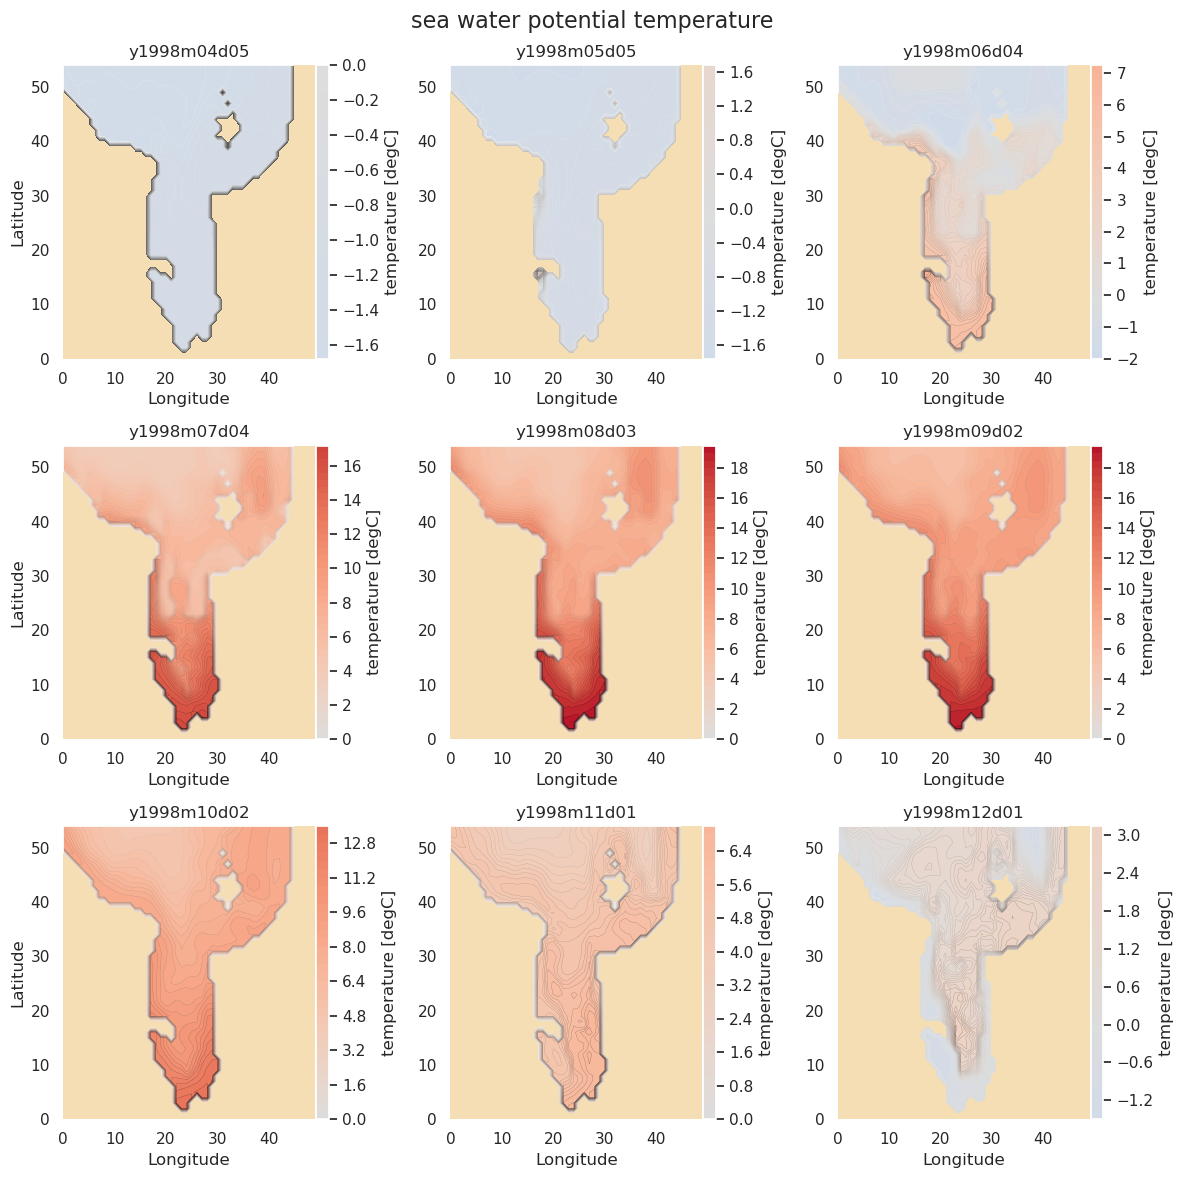

In [40]:

# Set up model depth level
depth = 0

# Setting ploting vars.
levels = 42

vmax=20.
vmin=-20.

# Choosing variable to plot 
var =  'votemper'

# Setting up figure
ncols = 3
nrows = len(file_list)//ncols
fig, ax = plt.subplots(ncols=ncols,nrows=nrows, figsize=[ncols*4,nrows*4])

for i, xx in enumerate(fig.axes):
        
    # Get data
    data = nc.Dataset(file_list[i])
    temp = data[var][:]

    # Cut data
    temp = temp[0,depth,x_range[0]:x_range[1],y_range[0]:y_range[1]]
    
    # Plotting data
    #plotting filled countour regions 
    im = xx.contourf(temp,levels=levels,cmap='coolwarm',vmin=vmin,vmax=vmax)

    # Plotting countor lines
    xx.contour(temp,levels=levels,cmap='Greys',linewidths=.1)
    #plt.contour(test_var[0,depth,x_range,20:120],levels=levels,cmap='Greys',linewidths=.2,vmin=vmin,vmax=vmax)
    #plt.colorbar()

    # Surface mask.
    xx.contourf(surf_mask, colors= 'wheat', zorder = 3)
    
    # Set axis labels
    xx.set_xlabel('Longitude')
    if i % ncols == 0:
        xx.set_ylabel('Latitude')

    # Set title
    #plt.title(data.variables['votemper'].standard_name)
    xx.set_title(file_list[i].split('/')[-1].split('_')[1])
    
    # Set Colorbar
    divider = make_axes_locatable(xx)
    cax = divider.append_axes('right', size='5%', pad=0.01)
    label = data.variables[var].long_name+' ['+data.variables[var].units+']'
    fig.colorbar(im, cax=cax, orientation='vertical',label=label)

fig.suptitle(data.variables[var].standard_name.replace('_',' '), fontsize=16)
fig.tight_layout()


1